In [1]:
from PIL import Image
import torch
from torchvision import transforms
import re
import glob
import os
import numpy as np
import imp
import matplotlib.pyplot as plt
import cv2 as cv
import pandas as pd
import pickle
import seaborn as sns
#from tqdm import tqdm_notebook as tqdm
import tqdm
import imp
from IPython.display import display, HTML
from sklearn.mixture import GaussianMixture
from scipy import stats
import json

import Prediction.dataset as dataset
from Prediction.detector import Detector_v4, Detector_v3
import Prediction.visualize as visualize
import Prediction.calibration as calib
#from Prediction.calibration import MTX, DIST, get_undistort_mapping, undistort_image, undistort_point

from Prediction.kalman_predict import ConstantVelocityKalmanPredictor
from Prediction.predictor import HitPredictor
from Prediction.visualize import process_video, get_correction_fn, offline_predictor_visualizer

WEIGHTS_PATH = 'Prediction/Yolo4/yolo4_gs_best_2306.weights'
CFG_PATH = 'Prediction/Yolo4/yolo4_2306.cfg'
#CFG_PATH = 'Prediction/Yolo4/yolo4_2306_384.cfg'
#CFG_PATH = 'Prediction/Yolo4/yolo4_2306_352.cfg'

In [2]:
first_date = dataset.ret_date("Pogona_Pursuit/Arena/experiments/circle_20200803T075244")
first_date = None
im = cv.imread('../Calib_frames/blk_sqr.jpg')

(mapx, mapy), roi, newcameramtx = calib.get_undistort_mapping(1440,1080)

aff, aff_im, p = calib.calibrate(calib.undistort_image(im,(mapx,mapy)))

df = dataset.get_unified_dataframe(vid_dims = (1440,1080), 
                                   first_date = first_date,
                                   align_touch_screen=True,
                                   add_dlc=False, multi_index=True,to_correct=True)

traj_predictor = ConstantVelocityKalmanPredictor(60)

hit_predictor = HitPredictor(trajectory_predictor = traj_predictor,prediction_y_threshold=50,y_thresh_above=False)

EXP_BASE = '../../Pogona_Pursuit/Arena/experiments/'

trial = ('line_20200803T081429',1)
vid_path,_ = dataset.get_trial_path(os.path.join(EXP_BASE,trial[0]),1)
bboxes = df.loc[trial][['x1','y1','x2','y2']].values
out_path = "../labelled/visualizer_test_2908.mp4"

skipped ../../Pogona_Pursuit/Arena/experiments/initial_20200727T071226, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/initial_20200727T073708, ignored word
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial1
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial2
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial3
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial4
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T083454, ignored word
did not find files in ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404 trial1
skipped ../../Pogona_Pursuit/Arena/experiments/test_fps_20200727T102701, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T105124, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T110833, ignored word
skipped ../../Pogona_P

/home/user/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:22: PerformanceWarning: indexing past lexsort depth may impact performance.


In [7]:
imp.reload(visualize)

<module 'Prediction.visualize' from '/app/Pogona_realtime/Arena/Prediction/visualize.py'>

In [7]:
hit_predictor.reset(history_size=5288)
visualize.process_video(vid_path, out_path, 
                        [visualize.offline_predictor_visualizer(hit_predictor,bboxes, show_forecast_bbox=False)],
                        correction_fn=get_correction_fn(aff_mat=aff, screen_width=p, screen_x_res=1920), 
                        num_frames=500)

In [5]:
unc_df = dataset.get_unified_dataframe(vid_dims = (1440,1080), 
                                   first_date = first_date,
                                   align_touch_screen=True,
                                   add_dlc=False, multi_index=True,to_correct=False)

skipped ../../Pogona_Pursuit/Arena/experiments/initial_20200727T071226, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/initial_20200727T073708, ignored word
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial1
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial2
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial3
did not find files in ../../Pogona_Pursuit/Arena/experiments/bug_size_20200727T080358 trial4
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T083454, ignored word
did not find files in ../../Pogona_Pursuit/Arena/experiments/test_20200727T100404 trial1
skipped ../../Pogona_Pursuit/Arena/experiments/test_fps_20200727T102701, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T105124, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/fps_check_20200727T110833, ignored word
skipped ../../Pogona_P

In [ ]:
plt.imshow(calib.undistort_image(im,(mapx,mapy)))

(-236.5793749938112,
 2027.4441244489612,
 2325.6259035076337,
 -170.35762069276444)

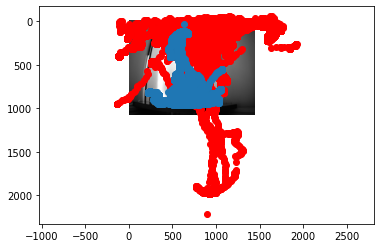

In [6]:
plt.imshow(calib.undistort_image(im,(mapx,mapy)))
plt.imshow(im)
plt.scatter(df['x2'],df['y2'],color='r')
plt.scatter(unc_df['x2'],unc_df['y2'])
plt.axis('equal')

In [ ]:
unc_df

In [17]:
np.array((1.2,1)).astype(int)

array([1, 1])

In [46]:
df['y2'].sort_values()[:5]

exper                           trial
fast_cockroach_20200803T085738  1        83.966748
                                1        84.014124
circle_20200803T120911          1        84.477140
fast_cockroach_20200803T085738  1        85.917809
                                1        87.368398
Name: y2, dtype: float64

In [23]:
np.ones(4,4)

TypeError: data type not understood

In [20]:
(mapx, mapy), roi = calib.get_undistort_mapping(1440,1080)

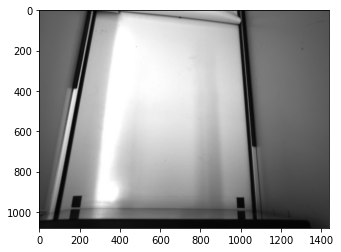

In [21]:
plt.imshow(calib.undistort_image(im,(mapx,mapy)))

In [55]:
df_path = '../../Pogona_Pursuit/Arena/experiments/circle_20200803T092248/trial1/rt_data/detections_df.csv'

In [253]:
json_paths = '../../Pogona_Pursuit/Arena/experiments/*/*/rt_data/vid_stats.json'

In [254]:
all_json_paths = glob.glob(json_paths)

In [255]:
all_json_paths

['../../Pogona_Pursuit/Arena/experiments/line_20200803T081429/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/line_20200803T081735/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/line_20200803T082002/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082414/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/fast_line_20200803T082724/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/circle_20200803T084227/trial2/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/circle_20200803T084529/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/circle_20200803T084529/trial2/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/experiments/fast_cockroach_20200803T085738/trial1/rt_data/vid_stats.json',
 '../../Pogona_Pursuit/Arena/exp

In [256]:
import json

In [263]:
width = 1440
mat = aff.tolist()

In [265]:
all_json_paths[0]

'../../Pogona_Pursuit/Arena/experiments/line_20200803T081429/trial1/rt_data/vid_stats.json'

In [267]:
for json_path in all_json_paths:
    with open(json_path, 'r') as f:
        d = json.load(f)
    if d['width'] == width:
        d['affine_mat'] = mat
    else:
        d['affine_mat'] = None
    
    with open(json_path, 'w') as f:
        json.dump(d, f)

In [ ]:
map

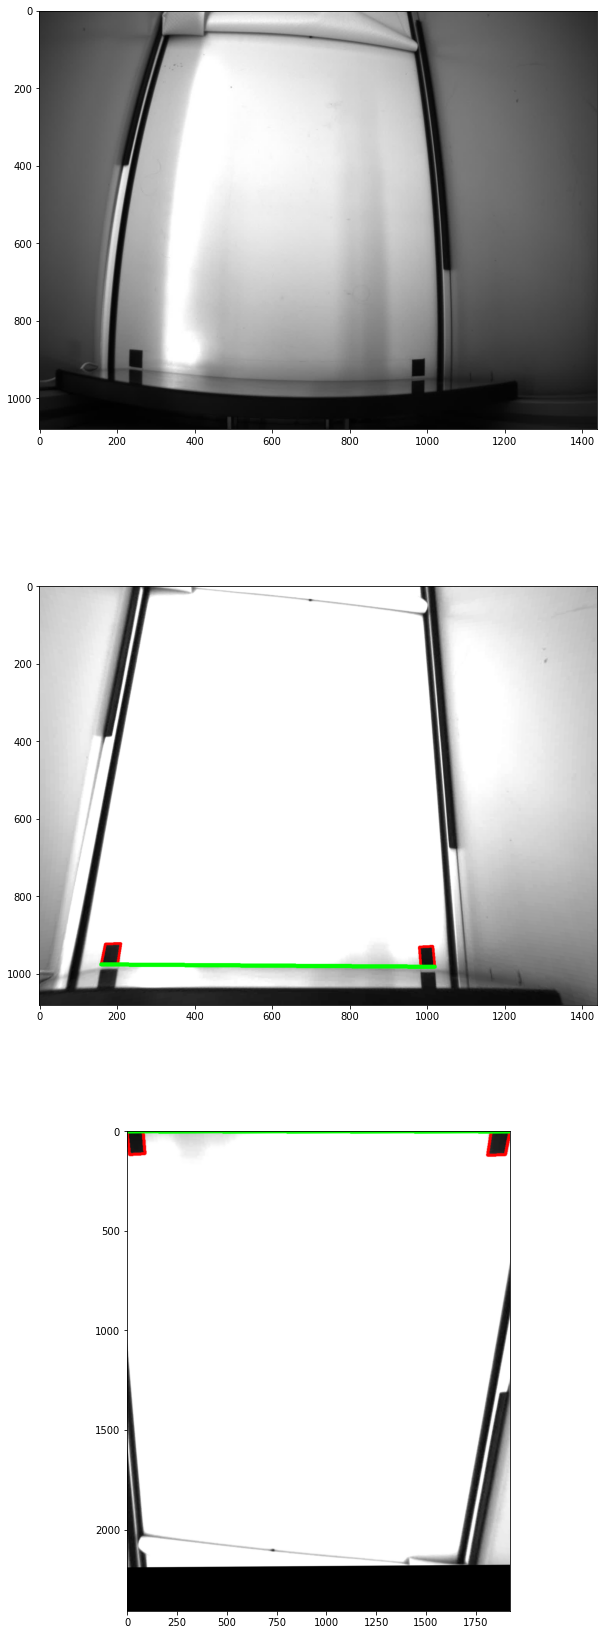

In [252]:
fig,axes = plt.subplots(3,1,figsize=(10,10*3))
axes[0].imshow(im)
axes[1].imshow(aff_im)
axes[2].imshow(calib.transform_image(aff_im, aff, 1920, p))

In [8]:
imp.reload(visualize)

<module 'Prediction.visualize' from '/app/Pogona_realtime/Arena/Prediction/visualize.py'>

In [109]:
vals = test[['x','y']].values

In [10]:
new_p = '../../Pogona_Pursuit/Arena/output/feeding_20200830-115520/19506468.avi'

In [12]:
visualize.process_video(video_path=new_p, output_path=None,process_fns=[visualize.video_sampler()])

TypeError: video_sampler() missing 3 required positional arguments: 'output_path', 'freq', and 'f_name'

In [23]:
img = cv.imread('../Calib_frames/chkr_2000.jpg',cv.IMREAD_COLOR)

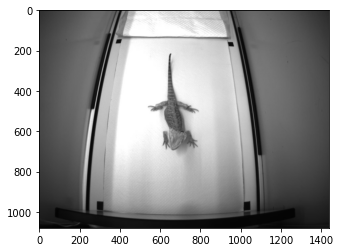

In [24]:
plt.imshow(img)

In [90]:
img = cv.imread('../Calib_frames/chkr_2000.jpg',cv.IMREAD_COLOR)
img = calib.undistort_image(img, (mapx, mapy))
cal_img = img.copy()
img = cv.cvtColor(cal_img.copy(), cv.COLOR_BGR2GRAY)
img = cv.convertScaleAbs(img, alpha=2.3, beta=1)

_, threshold = cv.threshold(img, 128, 255, cv.THRESH_BINARY_INV)
contours, _ = cv.findContours(threshold, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

In [91]:
len(contours)

40

In [92]:
def thresh_dist(poly, min_thresh, max_thresh):
    """
    Return True if the distance between each pair of points is larger than 
    min_thresh and smaller than max_thresh.
    """
    for i, p1 in enumerate(poly):
        for j, p2 in enumerate(poly[i + 1:]):
            norm = np.linalg.norm(p1 - p2)
            if norm < min_thresh or norm > max_thresh:
                return False
    return True


In [93]:
count = 0
polygons = []
for cnt in contours:
    approx = cv.approxPolyDP(cnt, 0.02 * cv.arcLength(cnt, True), True)
    if len(approx) != 4 or not thresh_dist(approx, 10, 150):
        continue
    count += 1

    # draw the sqaure polygons on the calibration image.
    cv.drawContours(img, [approx], 0, (255, 0, 0), 5)

    polygons.append(approx)

#if count != 4:
#    raise CalibrationException('Could not find two square marks in the image.')

polygons = [poly.squeeze() for poly in polygons]
#p_right, p_left = get_points(polygons)

In [94]:
len(polygons)

4

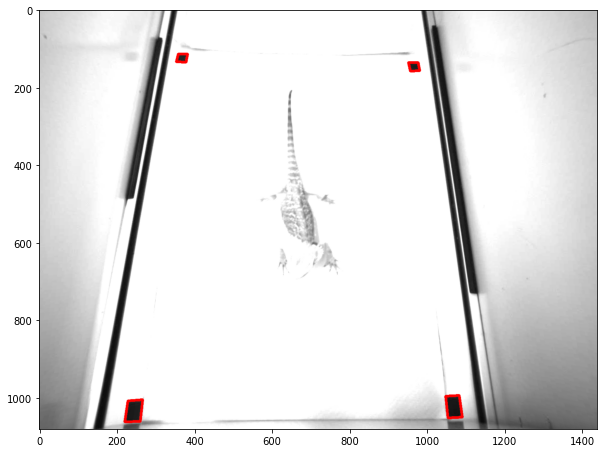

In [95]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [12]:
first_date

In [13]:
first_date = dataset.ret_date("Pogona_Pursuit/Arena/experiments/circle_20200803T075244")


In [102]:
heads = dataset.get_unified_heads_mat((1440,1080),first_date,resize=40)

skipped ../../Pogona_Pursuit/Arena/experiments/test-no-streaming-4_20200810T115814, ignored word
skipped ../../Pogona_Pursuit/Arena/experiments/test-no-streaming-rt-only_20200810T120030, ignored word
ignored ../../Pogona_Pursuit/Arena/experiments/fast_20200819T085841 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/fast_20200819T093920 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/circle_20200819T102503 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/worm_20200819T103031 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/worm_20200819T104454 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/worm_20200819T105608 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/red_beetle_20200824T073952 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/red_beetle_20200824T074504 trial1, 800 != 1440
ignored ../../Pogona_Pursuit/Arena/experiments/red_beetle_20200824T075143 trial1, 

In [103]:
heads.shape

(127025, 1600)

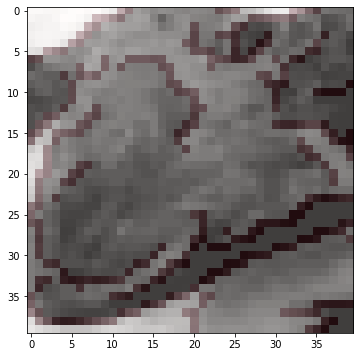

In [141]:
K = 50000
im = heads[K].reshape(40,40)
thr1 = 50
thr2 = 100
edges = cv.Canny(im.reshape(40,40),thr1,thr2)
im = cv.convertScaleAbs(im, alpha=1.3, beta=1)


fig, axes = plt.subplots(1,1,figsize=(10,6))
axes.imshow(edges,cmap='Reds',alpha=0.8)
axes.imshow(im,cmap='Greys',alpha=0.75)


In [55]:
%timeit edges = cv.Canny(im.reshape(32,32),thr1,thr2)


19.5 µs ± 1.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
